In [ ]:
!echo "Downloading files..."
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training1.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/training2.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_partial.zip
!wget -q https://github.com/byui-cse/cse450-course/raw/master/data/roadsigns/test_classes_partial.csv

!echo "Unzipping files..."
!unzip -q /content/training1.zip
!unzip -q /content/training2.zip
!unzip -q /content/test.zip
!unzip -q /content/test_partial.zip

# Combine the two traning directories
!echo "Merging training data..."
!mkdir /content/training
!mv /content/training1/* /content/training
!mv /content/training2/* /content/training

# Cleanup
!echo "Cleaning up..."
!rmdir /content/training1
!rmdir /content/training2
!rm training1.zip
!rm training2.zip
!rm test.zip
!rm test_partial.zip

!echo "Data ready."

Unzipping files...
Merging training data...
Cleaning up...
Data ready.


In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_dir = '/content/training/'
image_size = (100, 100)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=.2
)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=.2
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=image_size,
    subset="training",
    batch_size=32,
    class_mode='sparse',
    seed=42,
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    training_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='sparse',
    subset="validation",
    seed=42
)

Found 31612 images belonging to 43 classes.
Found 7892 images belonging to 43 classes.


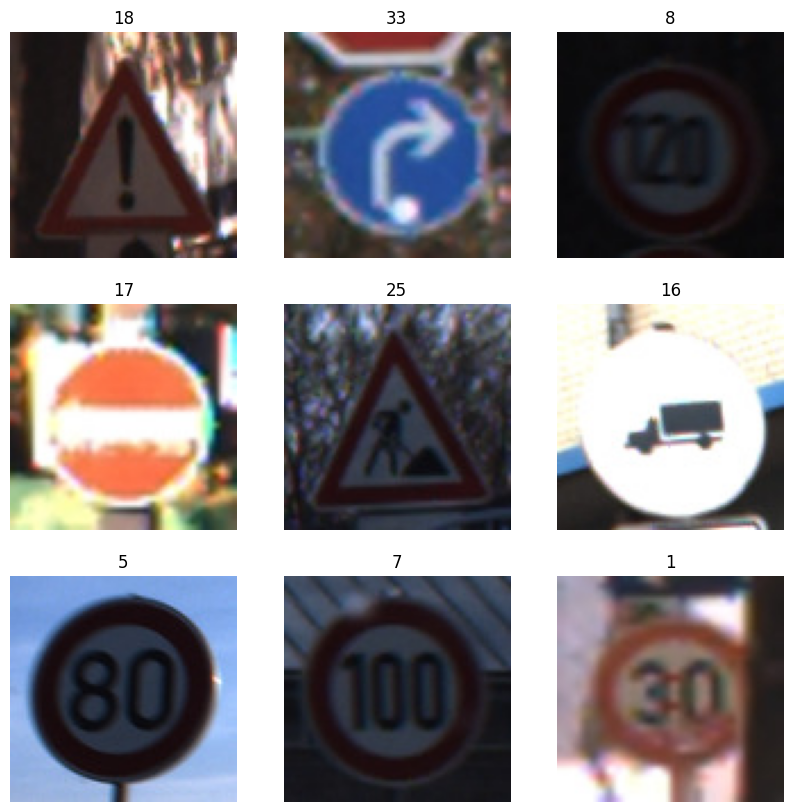

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        first_image = images.tolist()[i]
        ax = plt.subplot(3, 3, i + 1)
        f = np.array(first_image)*255
        plt.imshow(f.astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
    break

In [ ]:
from PIL import Image

image = Image.open('/content/training/00000/00000_00000.jpg')


width, height = image.size
channels = 3  # Assuming it's a color image with 3 channels (RGB)

print(f"Image shape: ({width}, {height}, {channels})")

Image shape: (100, 100, 3)


In [ ]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Transfer Learning
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import Xception

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))  # Replace 'number_of_classes' with the actual number of classes

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 10
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/10
988/988 [==============================] - 136s 95ms/step - loss: 0.8538 - accuracy: 0.7801 - val_loss: 0.1518 - val_accuracy: 0.9601
Epoch 2/10
988/988 [==============================] - 85s 86ms/step - loss: 0.0731 - accuracy: 0.9823 - val_loss: 0.0885 - val_accuracy: 0.9754
Epoch 3/10
988/988 [==============================] - 86s 87ms/step - loss: 0.0440 - accuracy: 0.9899 - val_loss: 0.0401 - val_accuracy: 0.9906
Epoch 4/10
988/988 [==============================] - 88s 90ms/step - loss: 0.0257 - accuracy: 0.9941 - val_loss: 0.0509 - val_accuracy: 0.9896
Epoch 5/10
988/988 [==============================] - 82s 83ms/step - loss: 0.0284 - accuracy: 0.9939 - val_loss: 0.0464 - val_accuracy: 0.9887
Epoch 6/10
988/988 [==============================] - 84s 85ms/step - loss: 0.0245 - accuracy: 0.9948 - val_loss: 0.0565 - val_accuracy: 0.9866
Epoch 7/10
988/988 [==============================] - 83s 84ms/step - loss: 0.0237 - accuracy: 0.9945 - val_loss: 0.0557 - val_accuracy

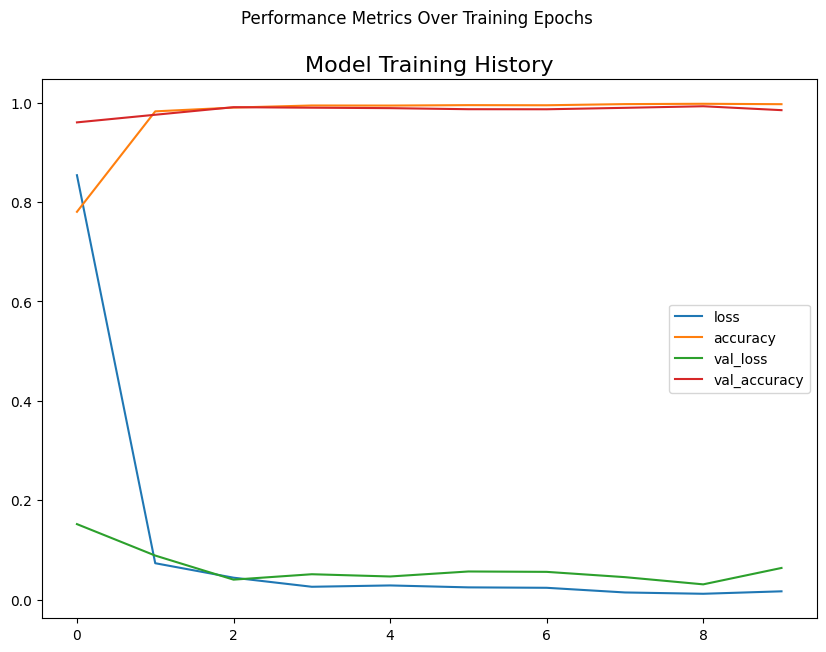

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'history' is your DataFrame
history = pd.DataFrame(history.history)

# Plotting the data
ax = history.plot(figsize=(10, 7))

# Adding title and subtitle
plt.title("Model Training History", fontsize=16)
plt.suptitle("Performance Metrics Over Training Epochs", fontsize=12)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    Assumes 'history' is a DataFrame.
    """
    loss = history['loss']
    val_loss = history['val_loss']

    accuracy = history['accuracy']
    val_accuracy = history['val_accuracy']

    epochs = range(len(history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()



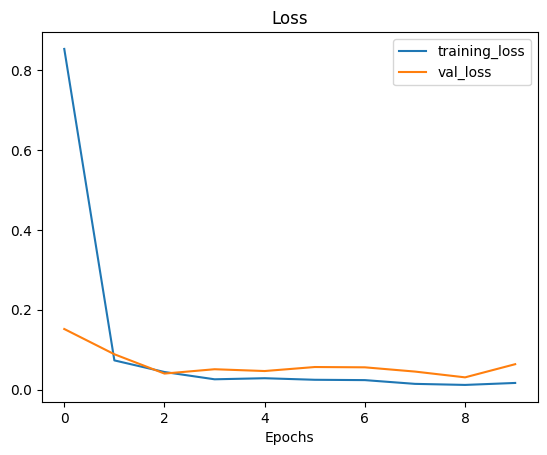

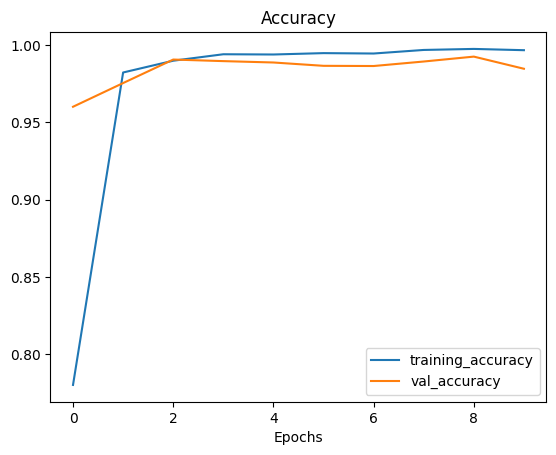

In [ ]:
# Assuming 'history' is your DataFrame
history = pd.DataFrame(history)

# Plotting the loss curves using your modified function
plot_loss_curves(history)

# Display the plot
plt.show()


In [ ]:
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test_partial'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 201 images belonging to 1 classes.
7/7 [==============================] - 3s 138ms/step


In [ ]:
test = pd.read_csv("test_classes_partial.csv")
test

,Filename,ClassId
0,00000.jpg,16
1,00001.jpg,1
2,00002.jpg,38
3,00003.jpg,33
4,00004.jpg,11
...,...,...
196,00196.jpg,8
197,00197.jpg,38
198,00198.jpg,18
199,00199.jpg,28


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test['ClassId'],predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8
           8       1.00      0.83      0.91         6
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         5
          17       1.00      1.00      1.00         7
          18       1.00    

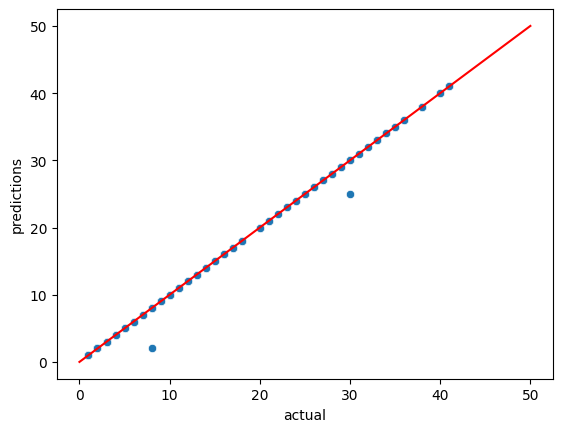

In [ ]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = test['ClassId' ]
pred

pred['difference'] = pred['actual']-pred['predictions']
pred

import seaborn as sns
xlims =(0,50)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()

In [ ]:
index = 2
test.insert(index, 'predictions', predictions)

In [ ]:
test['match'] = test['ClassId'] == test['predictions']

test['match'].value_counts()

True     199
False      2
Name: match, dtype: int64

In [ ]:
mismatches = test[~test['match']]
mismatches

,Filename,ClassId,predictions,match
39,00039.jpg,8,2,False
127,00127.jpg,30,25,False


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_dir = '/content/'

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        classes=['test'],
        target_size=image_size,
        class_mode='sparse',
        shuffle=False)
probabilities = model.predict(test_generator)
predictions = [np.argmax(probas) for probas in probabilities]

Found 12630 images belonging to 1 classes.
395/395 [==============================] - 13s 32ms/step


In [ ]:
# Specify the CSV file path
csv_file = 'dp-team4vInception3-module5-predictions.csv'

# Create a list with the heading
heading = ["predictions"]

# Use numpy.savetxt to save the data to a CSV file along with the heading
np.savetxt(csv_file, predictions, delimiter=',', fmt='%.5f', header=",".join(heading), comments='')

In [ ]:
import os
import zipfile

# Specify the directory where you want to save the model
save_directory = 'path_to_save_model/'

# Ensure the directory exists; if not, create it
os.makedirs(save_directory, exist_ok=True)

# Save the model
model_path = os.path.join(save_directory, 'my_model.h5')
model.save(model_path)

# Create a zip file containing the model
zip_path = os.path.join(save_directory, 'my_model.zip')
with zipfile.ZipFile(zip_path, 'w') as zipf:
    zipf.write(model_path, 'my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Specify the path to the zip file
zip_path = '/content/path_to_save_model/my_model.zip'

# Download the zip file
files.download(zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install coremltools
import coremltools as ct

mlmodel = ct.convert( model )

mlmodel.save("dp-Team4-Module5.mlpackage")

!zip -r /content/team4_ml.zip /content/Team4-Module5.mlpackage

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 7.5 MB/s eta 0:00:00


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 224.83 passes/s]
/usr/local/lib/python3.10/dist-packages/coremltools/converters/mil/backend/mil/load.py:581: UserWarning: Some dimensions in the input shape are unknown, hence they are set to flexible ranges with lower bound and default value = 1, and upper bound = 2. To set different values for the default shape and upper bound, please use the ct.RangeDim() method as described here: https://coremltools.readme.io/docs/flexible-inputs#set-the-range-for-each-dimension.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/coremltools/converters/mil/backend/mil/load.py:591: UserWarning: There is "None" dim in TF input placeholder. Please consider specifying input shapes by using the "inputs" param in ct.convert().
  warnings.warn(


	zip warning: name not matched: /content/Team4-Module5.mlpackage

zip error: Nothing to do! (try: zip -r /content/team4_ml.zip . -i /content/Team4-Module5.mlpackage)


In [ ]:
!zip -r /content/dp-Team4-Module5.zip /content/dp-Team4-Module5.mlpackage

  adding: content/dp-Team4-Module5.mlpackage/ (stored 0%)
  adding: content/dp-Team4-Module5.mlpackage/Manifest.json (deflated 59%)
  adding: content/dp-Team4-Module5.mlpackage/Data/ (stored 0%)
  adding: content/dp-Team4-Module5.mlpackage/Data/com.apple.CoreML/ (stored 0%)
  adding: content/dp-Team4-Module5.mlpackage/Data/com.apple.CoreML/model.mlmodel (deflated 93%)
  adding: content/dp-Team4-Module5.mlpackage/Data/com.apple.CoreML/weights/ (stored 0%)
  adding: content/dp-Team4-Module5.mlpackage/Data/com.apple.CoreML/weights/weight.bin (deflated 8%)
